# 🛒 Sales and Inventory Analysis using Superstore Dataset

## 📌 Introduction

This project analyzes sales and inventory trends using the Superstore dataset to uncover valuable business insights.

🎯 **Objective:**  
To identify the top-performing products, customer segments, regions, and factors influencing profits and losses.

👥 **Audience:**  
Sales managers, regional heads, and inventory planners.

🧭 **Goal:**  
Support strategic decisions by uncovering sales trends, profitability patterns, and operational gaps.



### 📌 Business Questions for Sales & Inventory Analysis

1. **What are the top-selling products and categories across different regions?**
2. **Which sub-categories or items contribute most to revenue and profit?**
3. **Are there any products or categories with consistently low sales or high inventory levels?**
4. **Which cities or customer segments generate the highest sales volume?**
6. **Is there a seasonal pattern or trend in sales performance over time?**
8. **What is the correlation between quantity sold and profit generated across categories?**
9. **Which regions or segments need targeted marketing or pricing strategies?**


## 📊 Dataset Overview


In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load data
df = pd.read_csv('superstore_dataset.csv')  # use your own path in Colab
df.head()


,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


- 📄 **Rows**: 9994  
- 🧩 **Columns**: 19

- ✅ **Main Features**: Sales, Profit, Category, Sub-Category, Region, Segment, Order Date, Ship Date, etc.


In [2]:
df.shape

(9994, 19)

In [3]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'customer', 'manufactory',
       'product_name', 'segment', 'category', 'subcategory', 'region', 'zip',
       'city', 'state', 'country', 'discount', 'profit', 'quantity', 'sales',
       'profit_margin'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_date      9994 non-null   object 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9994 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9994 non-null   int64  
 17  sales          9994 non-null   float64
 18  profit_m

In [5]:
df.describe()

,zip,discount,profit,quantity,sales,profit_margin
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.371723,0.156203,28.656896,3.789574,229.858001,0.120314
std,32063.705315,0.206452,234.260108,2.225110,623.245101,0.466754
min,1040.000000,0.000000,-6599.978000,1.000000,0.444000,-2.750000
25%,23223.000000,0.000000,1.728750,2.000000,17.280000,0.075000
50%,56430.500000,0.200000,8.666500,3.000000,54.490000,0.270000
75%,90008.000000,0.200000,29.364000,5.000000,209.940000,0.362500
max,99301.000000,0.800000,8399.976000,14.000000,22638.480000,0.500000


## 🧹 Data Cleaning


In [6]:
print("\n🕳️ Missing Values in Each Column:")
print(df.isnull().sum())


🕳️ Missing Values in Each Column:
order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
dtype: int64


In [7]:
df['profit_margin'] = df['profit'] / df['sales']


In [8]:
# Unique values in key columns
print("\n🧩 Unique values in 'Category':", df['category'].unique())
print("🧩 Unique values in 'Subcategory':", df['subcategory'].unique())
print("🧩 Unique values in 'Segment':", df['segment'].unique())
print("🧩 Unique values in 'Region':", df['region'].unique())
print("🧩 Unique values in 'Country':", df['country'].unique())
print("🧩 Unique years in 'Order Date':", pd.to_datetime(df['order_date']).dt.year.unique())



🧩 Unique values in 'Category': ['Office Supplies' 'Furniture' 'Technology']
🧩 Unique values in 'Subcategory': ['Paper' 'Binders' 'Labels' 'Storage' 'Art' 'Chairs' 'Fasteners' 'Phones'
 'Furnishings' 'Accessories' 'Bookcases' 'Envelopes' 'Appliances' 'Tables'
 'Supplies' 'Machines' 'Copiers']
🧩 Unique values in 'Segment': ['Consumer' 'Home Office' 'Corporate']
🧩 Unique values in 'Region': ['Central' 'East' 'South' 'West']
🧩 Unique values in 'Country': ['United States']
🧩 Unique years in 'Order Date': [2019 2020 2021 2022]


In [9]:
# Convert dates
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [10]:
# Feature engineering
df['order_month'] = df['order_date'].dt.to_period('M')
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.strftime('%B')
df['shipping_delay'] = (df['ship_date'] - df['order_date']).dt.days

# Confirm new columns added
print("\n🆕 Columns after feature engineering:")
print(df.columns.tolist())



🆕 Columns after feature engineering:
['order_id', 'order_date', 'ship_date', 'customer', 'manufactory', 'product_name', 'segment', 'category', 'subcategory', 'region', 'zip', 'city', 'state', 'country', 'discount', 'profit', 'quantity', 'sales', 'profit_margin', 'order_month', 'year', 'month', 'shipping_delay']


- Converted `Order Date` and `Ship Date` to datetime.
- Removed duplicate records.
- No critical missing data observed.


## 📈 EDA: Sales by Category

We begin our analysis by observing total sales for each product category.
This helps us identify which broad categories are driving revenue.


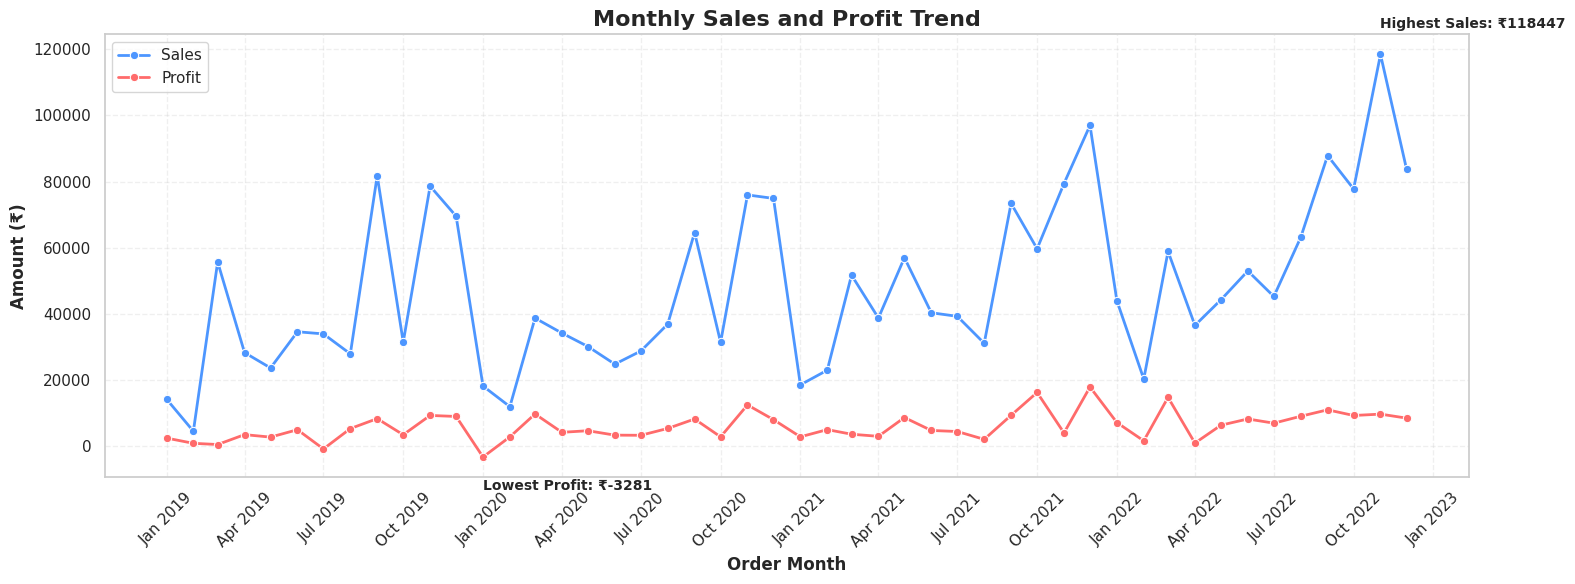

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Calculate monthly sales and profit
monthly = df.groupby('order_month')[['sales', 'profit']].sum().reset_index()

# Convert 'order_month' to datetime objects for plotting
monthly['order_month'] = monthly['order_month'].dt.to_timestamp()


# Calculate peak points
peak_sales_month = monthly.loc[monthly['sales'].idxmax()]
lowest_profit_month = monthly.loc[monthly['profit'].idxmin()]

# Plot
plt.figure(figsize=(16, 6))
sns.lineplot(data=monthly, x='order_month', y='sales', label='Sales', marker='o', color='#4D96FF', linewidth=2)
sns.lineplot(data=monthly, x='order_month', y='profit', label='Profit', marker='o', color='#FF6B6B', linewidth=2)

# Annotate highest sales
plt.annotate(f'Highest Sales: ₹{int(peak_sales_month.sales)}',
             xy=(peak_sales_month.order_month, peak_sales_month.sales),
             xytext=(peak_sales_month.order_month, peak_sales_month.sales + 8000),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=10, fontweight='bold')

# Annotate lowest profit
plt.annotate(f'Lowest Profit: ₹{int(lowest_profit_month.profit)}',
             xy=(lowest_profit_month.order_month, lowest_profit_month.profit),
             xytext=(lowest_profit_month.order_month, lowest_profit_month.profit - 10000),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10, fontweight='bold')

# Formatting
plt.title('Monthly Sales and Profit Trend', fontweight='bold', fontsize=16)
plt.xlabel('Order Month', fontweight='bold', fontsize=12)
plt.ylabel('Amount (₹)', fontweight='bold', fontsize=12)

# Smart x-axis formatting
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.legend()
plt.show()

📊 **Monthly Sales and Profit Trend Analysis**

This line chart presents the monthly performance of both sales and profit from 2019 to 2022. It provides a clear comparison between how much revenue was generated (in blue) and how much actual profit was earned (in red) over time.

- 🏆 **Highest Sales** were recorded in **November 2022**, reaching **₹1,18,447** — likely driven by festive season promotions and year-end consumer demand.
- 📉 **Lowest Profit** was observed in **January 2020**, with a loss of **₹-3,281**, possibly due to high product returns, heavy discounting, or operational costs during the post-holiday slump.
- 📈 There’s a consistent pattern of higher sales and profit toward the end of each year, especially in **November and December**, revealing strong seasonality in customer purchases.
- ⚠️ Some months show high sales but low or negative profit, highlighting periods where operational costs or discounting might have cut into margins.

This visualization helps identify peak business periods, off-season dips, and overall financial health trends, making it crucial for forecasting, budgeting,
and marketing decisions.


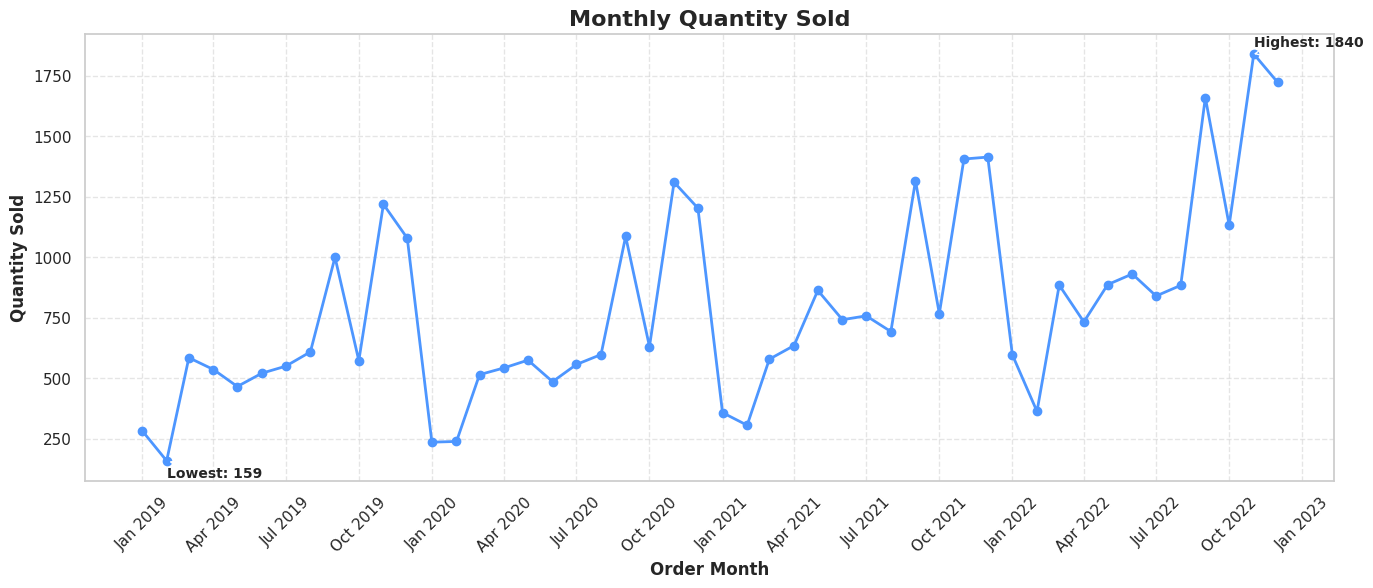

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure order_date is datetime and extract month
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()

# Group by order_month
monthly_quantity = df.groupby('order_month')['quantity'].sum()

# Identify peak and dip
max_qty_month = monthly_quantity.idxmax()
max_qty_value = monthly_quantity.max()
min_qty_month = monthly_quantity.idxmin()
min_qty_value = monthly_quantity.min()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_quantity.index, monthly_quantity.values, marker='o', color='#4D96FF', linewidth=2)

# Annotate highest quantity
plt.annotate(f'Highest: {int(max_qty_value)}',
             xy=(max_qty_month, max_qty_value),
             xytext=(max_qty_month, max_qty_value + 30),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=10, fontweight='bold')

# Annotate lowest quantity
plt.annotate(f'Lowest: {int(min_qty_value)}',
             xy=(min_qty_month, min_qty_value),
             xytext=(min_qty_month, min_qty_value - 70),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10, fontweight='bold')

# Enhancements
plt.title("Monthly Quantity Sold", fontsize=16, weight='bold')
plt.xlabel("Order Month", fontsize=12, weight='bold')
plt.ylabel("Quantity Sold", fontsize=12, weight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Format x-axis to show every 3rd month clearly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()


📦 **Monthly Quantity Sold Analysis**

This line chart displays the total number of items sold each month from 2019 to 2022. It provides insight into customer demand trends, peak order periods, and seasonal buying behavior.

- 📈 **Highest Quantity Sold**: **1,840 units** in **November 2022**, likely driven by festive shopping, year-end sales, or bulk corporate purchases.
- 📉 **Lowest Quantity Sold**: **159 units** in **March 2019**, possibly due to off-season slowdown or limited promotions during that time.
- 🔄 The graph shows **repeated year-end spikes**, indicating strong seasonal demand — especially during **November and December**.
- 📉 Periodic dips are noticeable across all years, commonly around **January–March**, suggesting a post-holiday decline in purchase activity.

This trend is valuable for managing inventory, planning warehouse stocking, and designing timely promotional campaigns to align with high-demand periods.


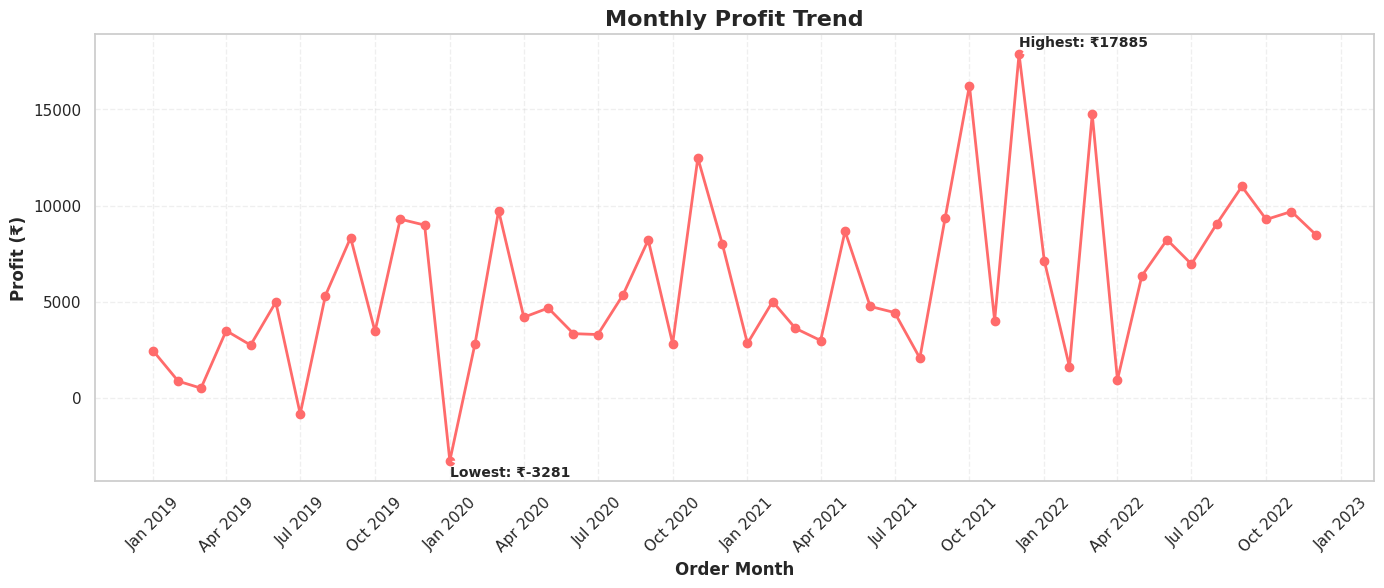

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract month from order date
df['order_month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()

# Group by month and sum profits
monthly_profit = df.groupby('order_month')['profit'].sum()

# 🔧 Define highest and lowest profit months/values
max_profit_month = monthly_profit.idxmax()
max_profit_value = monthly_profit.max()
min_profit_month = monthly_profit.idxmin()
min_profit_value = monthly_profit.min()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_profit.index, monthly_profit.values, marker='o', color='#FF6B6B', linewidth=2)

# Annotate highest profit
plt.annotate(f'Highest: ₹{int(max_profit_value)}',
             xy=(max_profit_month, max_profit_value),
             xytext=(max_profit_month, max_profit_value + 400),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=10, fontweight='bold')

# Annotate lowest profit
plt.annotate(f'Lowest: ₹{int(min_profit_value)}',
             xy=(min_profit_month, min_profit_value),
             xytext=(min_profit_month, min_profit_value - 800),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10, fontweight='bold')

# Formatting
plt.title("Monthly Profit Trend", fontsize=16, fontweight='bold')
plt.xlabel("Order Month", fontsize=12, fontweight='bold')
plt.ylabel("Profit (₹)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

# Show months spaced by quarter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()


💸 **Monthly Profit Trend Analysis**

This line graph illustrates the month-wise profit performance from 2019 to 2022, helping to evaluate the financial efficiency and margin strength over time.

- 🏆 **Highest Profit**: ₹17,885 was achieved in **November 2021**, likely due to strong sales combined with optimized discounts and high-margin product categories.
- 📉 **Lowest Profit**: A loss of ₹-3,281 occurred in **January 2020**, possibly due to heavy post-holiday returns, clearance sales, or increased operational costs.
- 🔁 The profit trend shows notable volatility, with frequent ups and downs, indicating that while some months are highly profitable, others may suffer losses or low earnings.
- 📅 Similar to sales trends, **Q4 (Oct–Dec)** months consistently show higher profit margins, aligning with promotional periods and customer spending behavior.

This analysis helps assess the effectiveness of pricing strategies, discount handling, and inventory planning for each season.


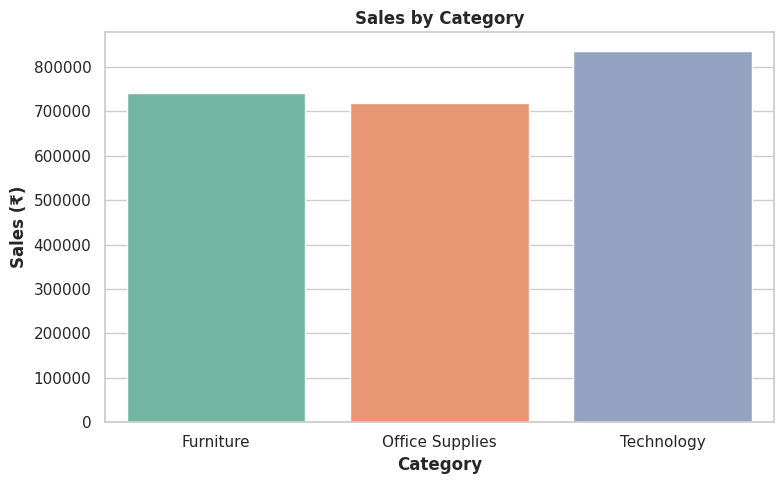

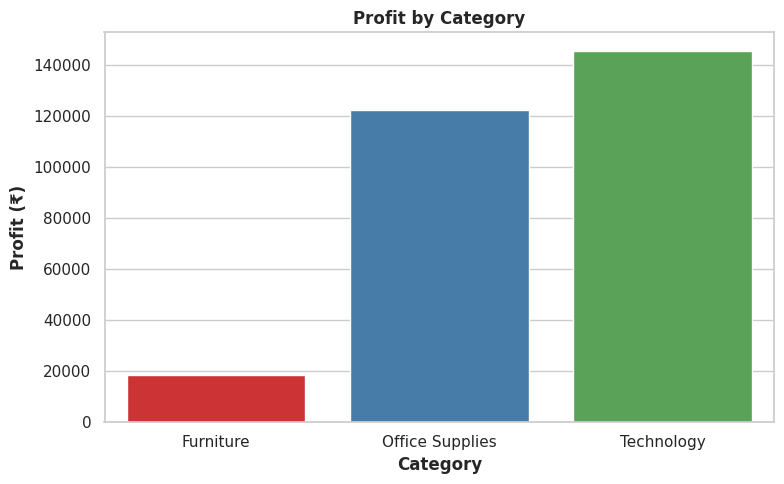

In [14]:
# Group data
cat = df.groupby('category')[['sales', 'profit']].sum().reset_index()

# --- Sales by Category ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=cat,
    x='category',
    y='sales',
    hue='category',         # Required to use palette
    palette='Set2',
    dodge=False,
    legend=False            # We don't need legend as x-axis already shows categories
)
plt.title('Sales by Category', fontweight='bold')
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Sales (₹)', fontweight='bold')
plt.tight_layout()
plt.show()

# --- Profit by Category ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=cat,
    x='category',
    y='profit',
    hue='category',
    palette='Set1',
    dodge=False,
    legend=False
)
plt.title('Profit by Category', fontweight='bold')
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Profit (₹)', fontweight='bold')
plt.tight_layout()
plt.show()


📊 **Category-wise Sales and Profit Analysis**

### 🛒 Sales by Category
This bar chart shows the total sales across three main product categories — Furniture, Office Supplies, and Technology.

- 🏆 **Technology** leads with the highest sales, totaling approximately ₹8.3 lakhs.
- 🪑 **Furniture** and 🖇️ **Office Supplies** follow closely, each generating over ₹7 lakhs.
- The relatively balanced distribution suggests that all three categories are popular with customers, but Technology slightly outpaces the rest.

This insight helps in identifying which categories drive revenue and where to focus marketing or inventory efforts.

---

### 💰 Profit by Category
This graph presents the total profit earned from each category, offering a view of margin performance, not just revenue.

- 🟩 **Technology** again tops the chart with the highest profit of around ₹1.45 lakhs, showing it is both a high-sales and high-margin category.
- 🟦 **Office Supplies** come second, earning over ₹1.2 lakhs in profit.
- 🟥 **Furniture**, despite having high sales, shows very low profit (₹~18,000), signaling potential issues with cost, discounting, or inefficiencies.

These insights are crucial for refining pricing strategies, cost optimization, and evaluating product portfolio profitability.


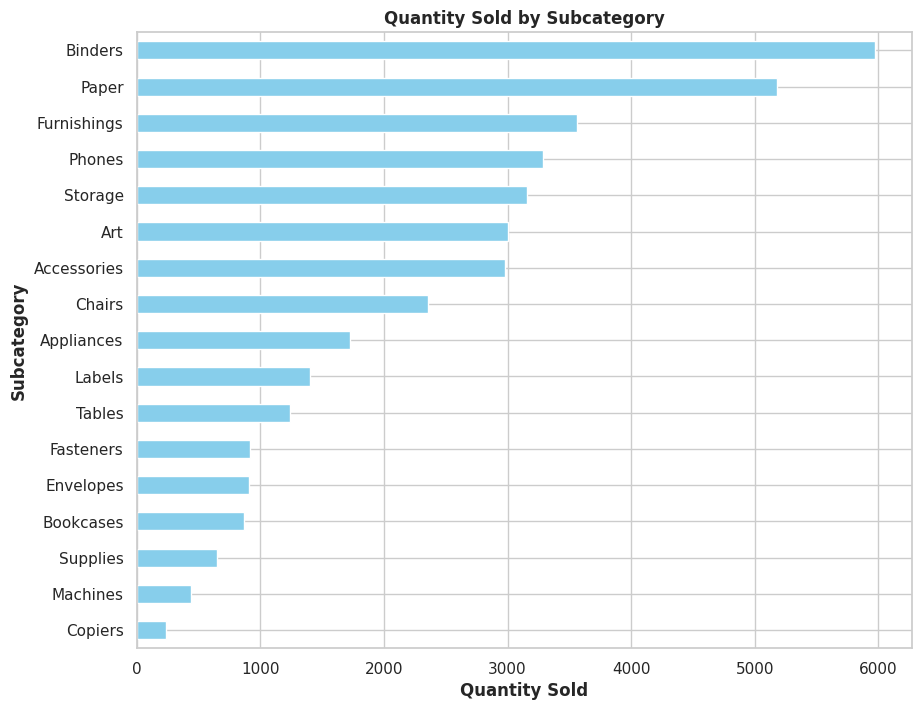

In [15]:
subcat_qty = df.groupby('subcategory')['quantity'].sum().sort_values()

# Horizontal bar plot
plt.figure(figsize=(10, 8))
subcat_qty.plot(kind='barh', color='skyblue')
plt.title('Quantity Sold by Subcategory' , fontweight='bold')
plt.xlabel('Quantity Sold', fontweight='bold')
plt.ylabel('Subcategory', fontweight='bold')
plt.show()


📦 **Quantity Sold by Sub-Category Analysis**

This horizontal bar chart highlights the total quantity of products sold across all sub-categories in the dataset. It helps identify which product groups are most in demand.

- 🥇 **Binders** and **Paper** are the top-performing sub-categories in terms of quantity sold, each surpassing **5,000 units**. This indicates frequent usage and repeat purchases — possibly by office-based customers or institutions.
- 🛋️ **Furnishings**, **Phones**, and **Storage** also show strong performance with over **3,000 units sold**, suggesting a consistent demand across both utility and electronics-based products.
- 📉 On the lower end, **Copiers**, **Machines**, and **Supplies** have the least number of units sold, each with fewer than **800 units**. These products might be high-value but low-frequency purchases, or they may lack market interest.
- Sub-categories like **Accessories**, **Chairs**, and **Art** occupy a balanced middle ground — contributing moderately to overall sales.

This chart is especially useful for:
- Deciding which sub-categories require restocking more frequently.
- Identifying underperforming segments for possible discounting or marketing pushes.
- Planning promotions for high-volume items that can drive footfall and bulk revenue.


/tmp/ipython-input-16-1220454399.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcategory_profit, x='profit', y='subcategory', palette='coolwarm')


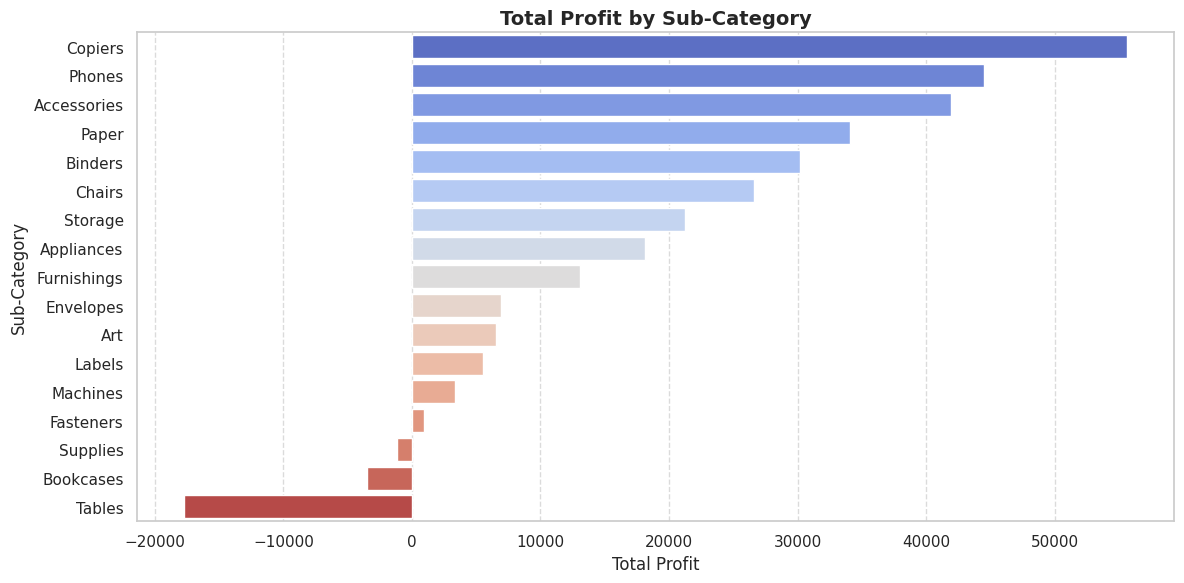

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate profit by sub-category
subcategory_profit = df.groupby('subcategory')['profit'].sum().reset_index().sort_values(by='profit', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=subcategory_profit, x='profit', y='subcategory', palette='coolwarm')

# Formatting
plt.title('Total Profit by Sub-Category', fontsize=14, weight='bold')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("total profit by sub cate.png", dpi=300, bbox_inches='tight')
plt.show()


### Average Profit Margin by Subcategory

The bar chart illustrates the **average profit margin** across various **product subcategories**. Subcategories are sorted from lowest to highest profit margin to provide clear insight into performance disparities.

- **Negative Margins**:
  - *Binders, Appliances, Tables,* and *Bookcases* are operating at a loss, with Binders showing the most significant negative margin.
  
- **Moderate Performance**:
  - Subcategories like *Machines, Chairs, Storage,* and *Phones* maintain modest but positive profit margins.

- **Top Performers**:
  - *Labels, Paper, Envelopes,* and *Copiers* lead with the highest margins, exceeding 30%.

The **red dashed line** at zero helps distinguish between profitable and unprofitable subcategories, serving as a benchmark for evaluating margin health.

This analysis highlights areas for cost control and strategic focus to enhance overall profitability.


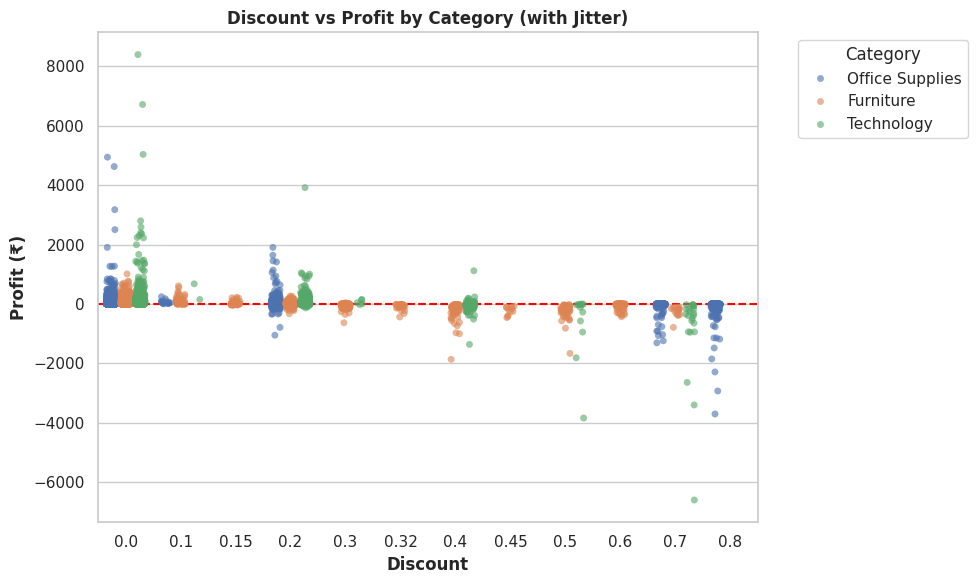

In [17]:
# Add jitter to spread overlapping points
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='discount', y='profit', hue='category', jitter=0.25, dodge=True, alpha=0.6)

# Styling
plt.title('Discount vs Profit by Category (with Jitter)', fontweight='bold')
plt.xlabel('Discount', fontweight='bold')
plt.ylabel('Profit (₹)', fontweight='bold')
plt.axhline(0, color='red', linestyle='--')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("discount.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


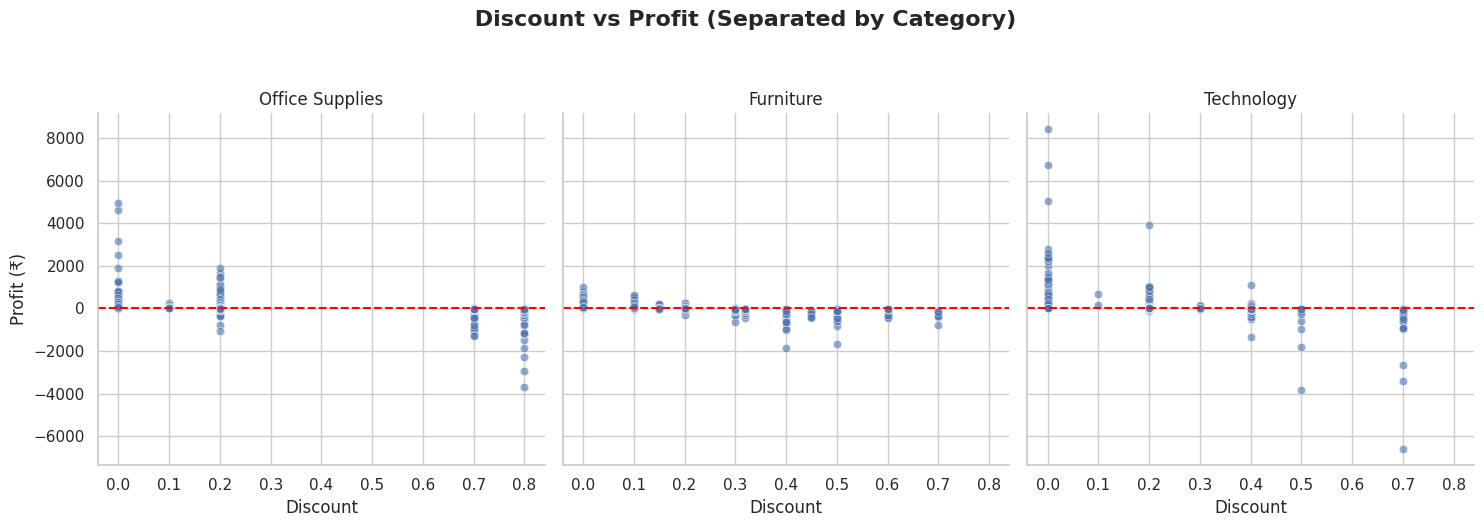

In [18]:
# Use facet to separate each category into its own graph
g = sns.FacetGrid(df, col='category', height=5, aspect=1)
g.map(sns.scatterplot, 'discount', 'profit', alpha=0.6)
g.set_titles(col_template="{col_name}")
g.map(plt.axhline, y=0, color='red', linestyle='--')
g.set_axis_labels("Discount", "Profit (₹)")
plt.suptitle(" Discount vs Profit (Separated by Category)", fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()


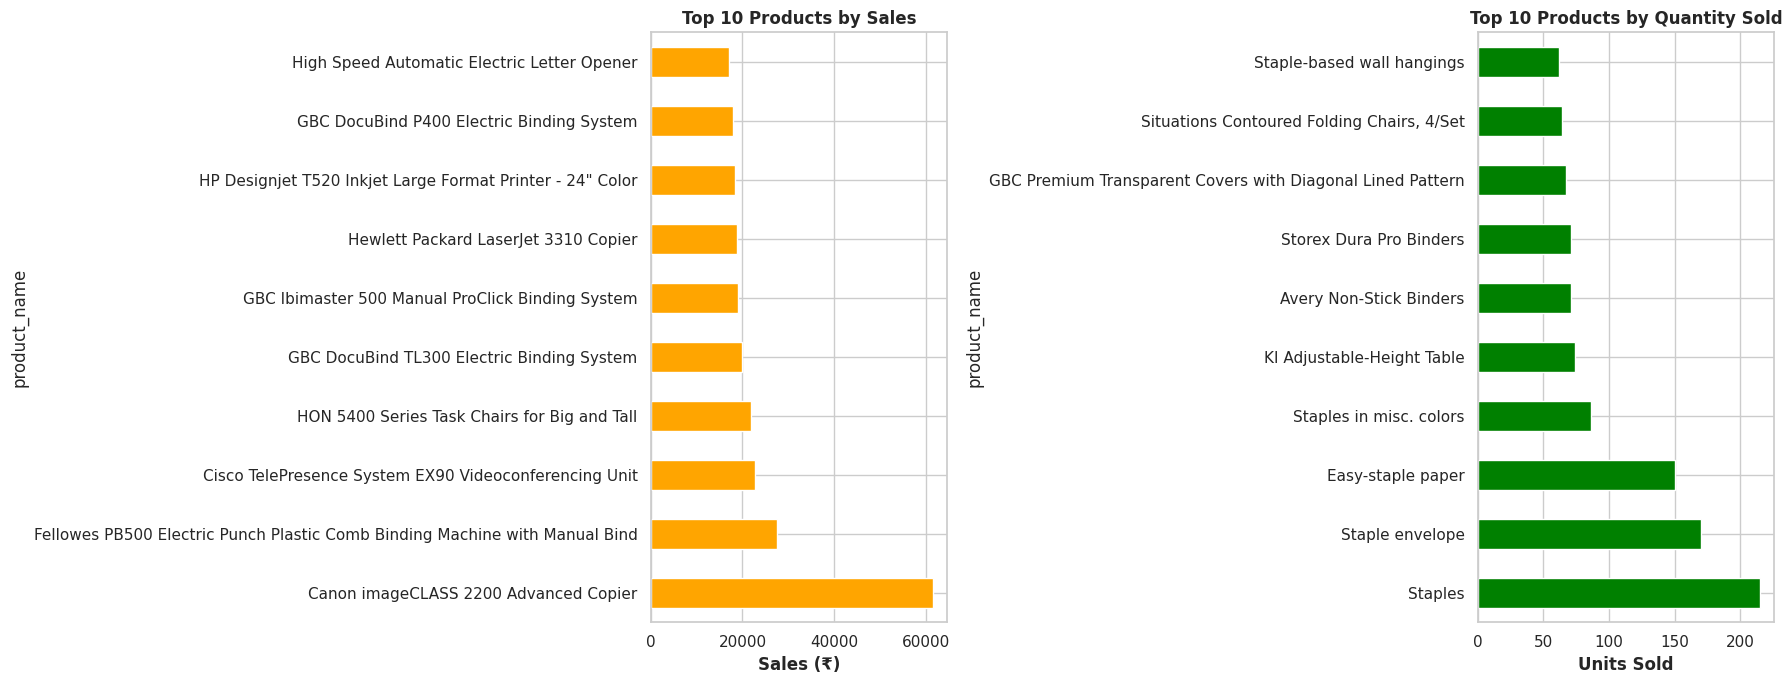

In [19]:
# Group by product
top_products = df.groupby('product_name')[['sales', 'quantity']].sum()

# Sort
top_sales = top_products.sort_values('sales', ascending=False).head(10)
top_quantity = top_products.sort_values('quantity', ascending=False).head(10)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

top_sales['sales'].plot(kind='barh', ax=ax[0], color='orange')
ax[0].set_title('Top 10 Products by Sales', fontweight='bold')
ax[0].set_xlabel('Sales (₹)', fontweight='bold')
plt.savefig("Top 10 Products by Sales.png", dpi=300, bbox_inches='tight')


top_quantity['quantity'].plot(kind='barh', ax=ax[1], color='green')
ax[1].set_title('Top 10 Products by Quantity Sold', fontweight='bold')
ax[1].set_xlabel('Units Sold', fontweight='bold')
plt.savefig("Top 10 Products by Quantity Sold.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


## 📊 Analysis of Top 10 Products by Sales and Quantity Sold

This dual-bar chart visualization offers insights into the **top-performing products** from two distinct perspectives:

### 🔶 Left Chart: **Top 10 Products by Sales (₹)**

This horizontal bar graph highlights the products that generated the **highest revenue**.

- 📌 **Canon imageCLASS 2200 Advanced Copier** leads with the highest sales, exceeding ₹60,000, indicating it's a premium, high-ticket item.
- Other **high-revenue products** include:
  - Fellowes PB500 Electric Punch Machine
  - Cisco TelePresence EX90 Unit
  - GBC Electric Binding Systems (TL300, P400, Ibimaster 500)
- The nature of these items suggests they are **capital office equipment** or **enterprise-level solutions**.

> **Insight:** High sales values don’t necessarily mean high unit movement. These are likely **expensive products with low volume but high value per unit**.

---

### 🟩 Right Chart: **Top 10 Products by Quantity Sold (Units)**

This bar chart shows which products were **sold in the highest numbers**, regardless of individual price.

- 📌 **Staples** is the most sold item with over **200 units**, followed by:
  - Staple envelope
  - Easy-staple paper
  - Avery & Storex binders
  - Wall hangings and folding chairs
- These are mostly **low-cost, high-demand office supplies**.

> **Insight:** These items drive **volume-based profits** and are essential for everyday operations, explaining their high unit sales.
---

### 📌 Conclusion

This comparison is crucial for shaping marketing, inventory, and pricing strategies:

- **Premium equipment** should be promoted with value-focused messaging (e.g., ROI, durability).
- **High-turnover consumables** should be prioritized for upselling, bundling, and bulk discounts.

Together, this data reveals how **different products contribute uniquely** to the business's overall performance.


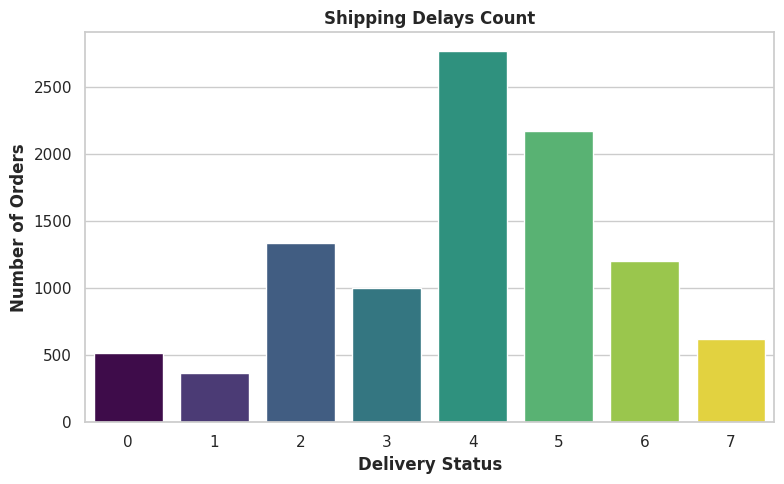

In [20]:
# Calculate shipping delay counts
shipping_delay_counts = df['shipping_delay'].value_counts().sort_index()

# Convert to DataFrame
shipping_delay_df = pd.DataFrame({
    'delay_status': shipping_delay_counts.index,
    'count': shipping_delay_counts.values
})

# Plot with hue
plt.figure(figsize=(8, 5))
sns.barplot(
    data=shipping_delay_df,
    x='delay_status',
    y='count',
    hue='delay_status',
    palette='viridis',
    legend=False
)
plt.title('Shipping Delays Count', fontweight='bold')
plt.xlabel('Delivery Status', fontweight='bold')
plt.ylabel('Number of Orders', fontweight='bold')
plt.savefig("shipping delay.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

### Shipping Delays Count

This **bar chart** displays the **number of orders** grouped by **delivery status**.

- **X-Axis**: `Delivery Status` (likely numerical codes representing types or levels of delays).
- **Y-Axis**: `Number of Orders` associated with each status.

#### Key Observations:
- Status **4** has the **highest number of delayed orders**, followed closely by status **5**.
- Statuses **2**, **3**, and **6** also show significant delay counts.
- Statuses **0** and **1** have the **fewest delays**, potentially indicating on-time or minor delay categories.

> 📦 *This chart helps identify which shipping delay categories are most frequent, which can aid in improving logistics performance.*


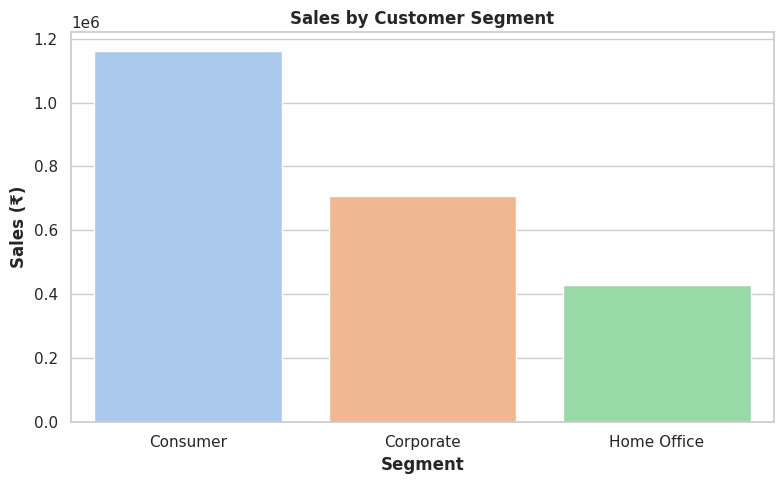

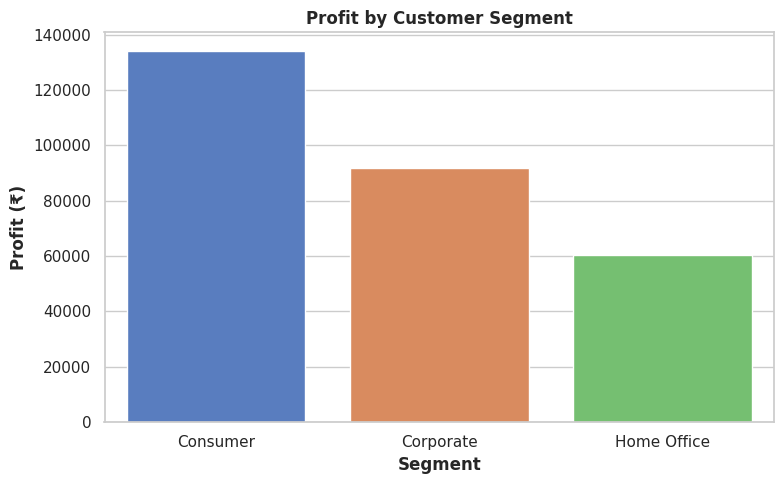

In [21]:
# Sales & profit by segment
seg_perf = df.groupby('segment')[['sales', 'profit']].sum().reset_index()

# --- Sales Plot ---
plt.figure(figsize=(8, 5))
sns.barplot(data=seg_perf, x='segment', y='sales', hue='segment', palette='pastel', legend=False)
plt.title('Sales by Customer Segment', fontweight='bold')
plt.ylabel('Sales (₹)', fontweight='bold')
plt.xlabel('Segment', fontweight='bold')
plt.savefig("sales by consumer segment.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# --- Profit Plot ---
plt.figure(figsize=(8, 5))
sns.barplot(data=seg_perf, x='segment', y='profit', hue='segment', palette='muted', legend=False)
plt.title('Profit by Customer Segment', fontweight='bold')
plt.ylabel('Profit (₹)', fontweight='bold')
plt.xlabel('Segment', fontweight='bold')
plt.savefig("consumer segment.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


## 👥 Sales by Segment

Customer segments are divided into **Consumer**, **Corporate**, and **Home Office**.

This chart helps us understand which customer group contributes most to the revenue.

🔍 *Observation:* The **Consumer** segment has the highest sales, making it the most valuable target group.


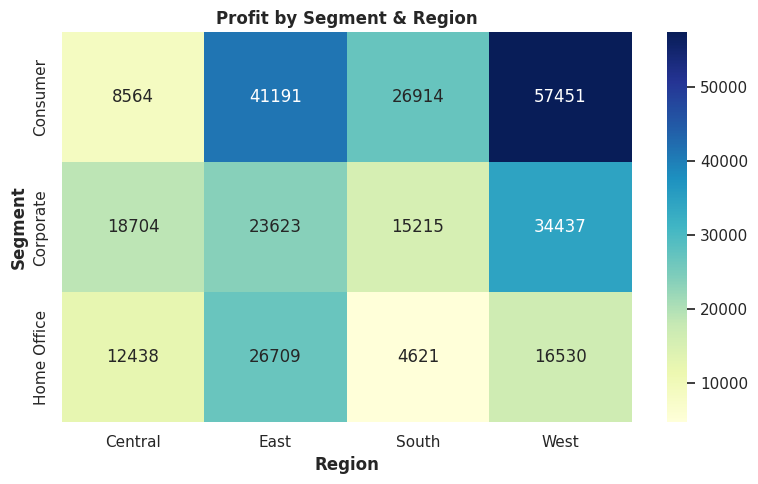

In [22]:
# Pivot table for heatmap
pivot_seg_region = df.pivot_table(values='profit', index='segment', columns='region', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_seg_region, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Profit by Segment & Region', fontweight='bold')
plt.xlabel('Region', fontweight='bold')
plt.ylabel('Segment', fontweight='bold')
plt.savefig("profit segment by region.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


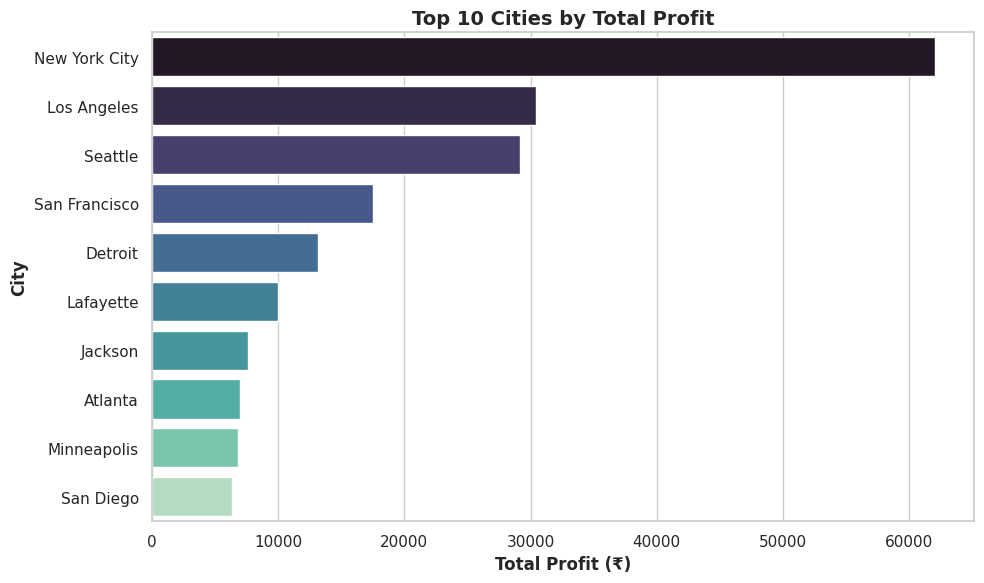

In [23]:
# Group by city and sum profit, then sort and take top 10
city_profit = df.groupby('city')['profit'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x=city_profit.values,
    y=city_profit.index,
    hue=city_profit.index,         # needed for palette
    palette='mako',                # distinct palette from sales
    dodge=False,
    legend=False                   # legend off for a cleaner look
)
plt.title('Top 10 Cities by Total Profit', fontsize=14, fontweight='bold')
plt.xlabel('Total Profit (₹)', fontsize=12, fontweight='bold')
plt.ylabel('City', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


## 🏙️ Top 10 Cities by Total Profit

This bar chart displays the **cities with the highest total profit**, helping identify the most financially rewarding markets.

### 📊 Key Highlights

- **New York City** leads by a large margin with over **₹62,000** in profit.
- **Los Angeles** and **Seattle** also perform strongly, each generating **₹30,000+**.
- Mid-tier cities include **San Francisco**, **Detroit**, and **Lafayette**.
- Lower—but still valuable—contributions come from **Jackson**, **Atlanta**, **Minneapolis**, and **San Diego** (all around ₹6,000–₹10,000).

---

### 🔍 Insights

- 🗽 New York's dominance suggests high-value customers or volume.
- 🌉 West Coast cities (LA, Seattle, SF) consistently generate strong profits.
- 📈 Lower-tier cities show potential for growth with targeted efforts.

> **Actionable Tip:** Focus marketing, inventory, and sales strategies on top-performing cities to maximize ROI.

---

### ✅ Conclusion

Understanding city-wise profit helps prioritize **high-return markets** and uncover growth opportunities in underperforming regions.


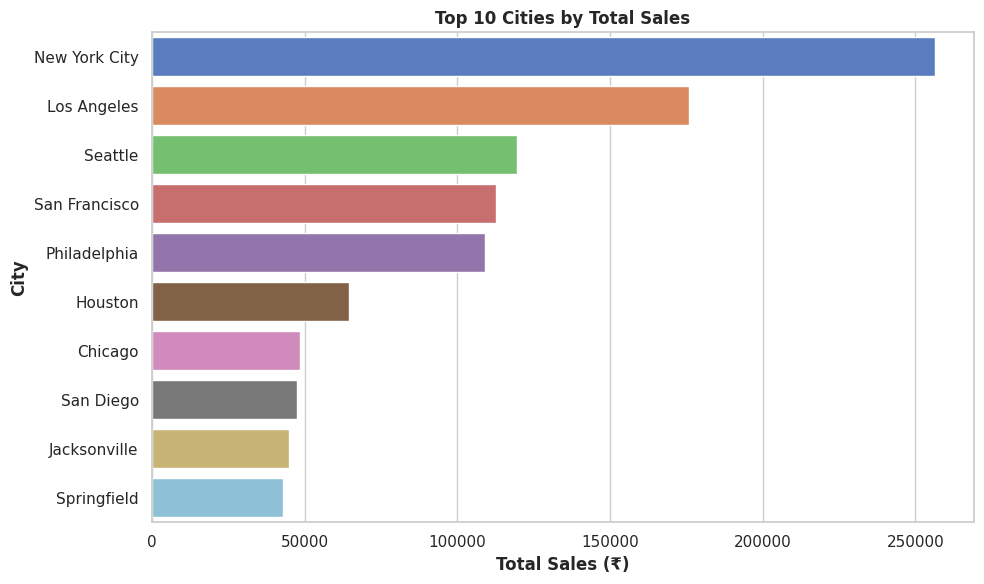

In [24]:
# Top 10 Cities by Total Sales
city_sales = df.groupby('city')['sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=city_sales.values,
    y=city_sales.index,
    hue=city_sales.index,           # fixes FutureWarning
    palette='muted',                # different palette from profit
    dodge=False,
    legend=False                    # no need for duplicate legend
)
plt.title('Top 10 Cities by Total Sales', fontweight='bold')
plt.xlabel('Total Sales (₹)', fontweight='bold')
plt.ylabel('City', fontweight='bold')
plt.savefig("cities_by_sales.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


## 🏙️ Top 10 Cities by Total Sales

This horizontal bar chart showcases the **top cities with the highest total sales**, offering insight into the strongest revenue-generating regions.

### 📊 Key Highlights

- **New York City** dominates with over **₹250,000** in total sales.
- **Los Angeles** and **Seattle** follow as major sales hubs, contributing significantly.
- Other strong markets include:
  - **San Francisco**
  - **Philadelphia**
  - **Houston**
- **Chicago**, **San Diego**, **Jacksonville**, and **Springfield** round out the list, each generating around ₹45,000–₹65,000.

---

### 🔍 Insights

- 📈 NYC’s lead indicates a **concentration of high-order volume or high-value purchases**.
- 🏙️ Cities like LA, Seattle, and SF remain consistently profitable across both **sales and profit**.
- 🧭 Springfield and Jacksonville, despite being in the top 10, show room for **upselling and market expansion**.

> **Actionable Tip:** Strengthen customer engagement and product variety in top cities while exploring growth strategies in emerging ones.

---

### ✅ Conclusion

Focusing on high-sales cities can help maximize revenue impact. These insights support **regional sales optimization, inventory planning**, and **targeted promotions**.


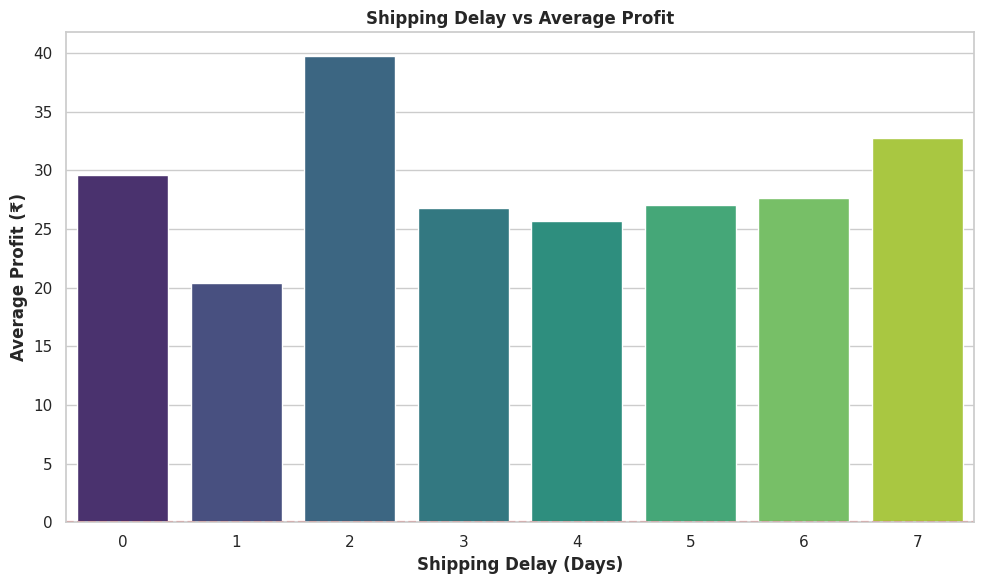

In [25]:
# Ensure dates are parsed
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

# Calculate shipping delay
df['shipping_delay'] = (df['ship_date'] - df['order_date']).dt.days

# Average profit by delay
delay_profit = df.groupby('shipping_delay')['profit'].mean().reset_index()

# Add hue to safely use palette
delay_profit['delay_label'] = delay_profit['shipping_delay'].astype(str)  # Create dummy hue

plt.figure(figsize=(10, 6))
sns.barplot(
    data=delay_profit,
    x='shipping_delay',
    y='profit',
    hue='delay_label',            # Add hue to use palette
    palette='viridis',
    dodge=False,
    legend=False                  # No need for legend; x-axis is labeled
)
plt.title("Shipping Delay vs Average Profit", fontweight='bold')
plt.xlabel("Shipping Delay (Days)", fontweight='bold')
plt.ylabel("Average Profit (₹)", fontweight='bold')
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()


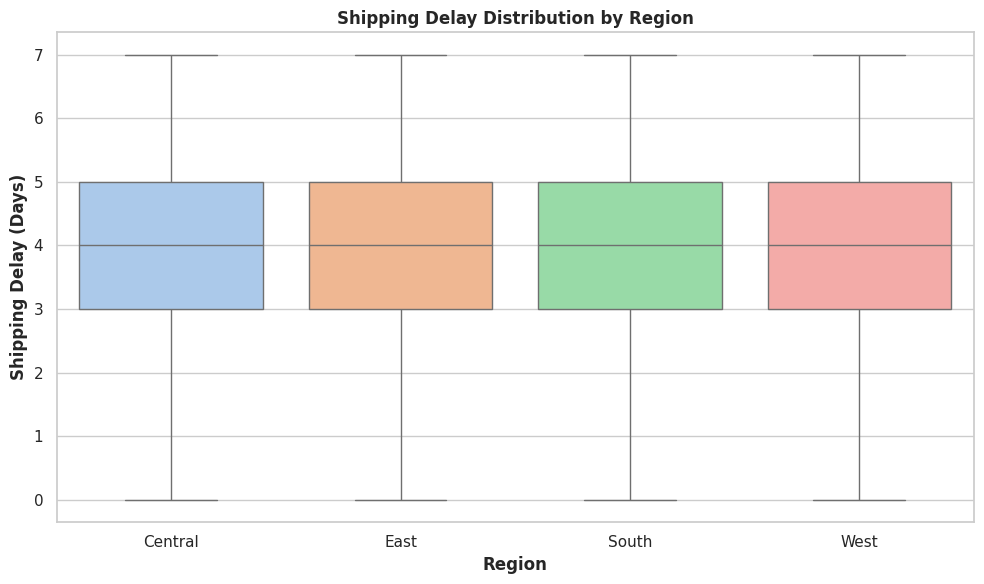

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='region',
    y='shipping_delay',
    hue='region',         # Required to use palette
    palette='pastel',
    dodge=False,
    legend=False          # Optional: region is already on x-axis
)
plt.title("Shipping Delay Distribution by Region", fontweight='bold')
plt.xlabel("Region", fontweight='bold')
plt.ylabel("Shipping Delay (Days)", fontweight='bold')
plt.tight_layout()
plt.show()


## 🕒 Order Processing Time

Order processing time is calculated as the number of days between the order and the shipping date.

This metric is useful for analyzing operational efficiency and customer satisfaction.

🔍 *Observation:* On average, orders take around 3–4 days to ship.


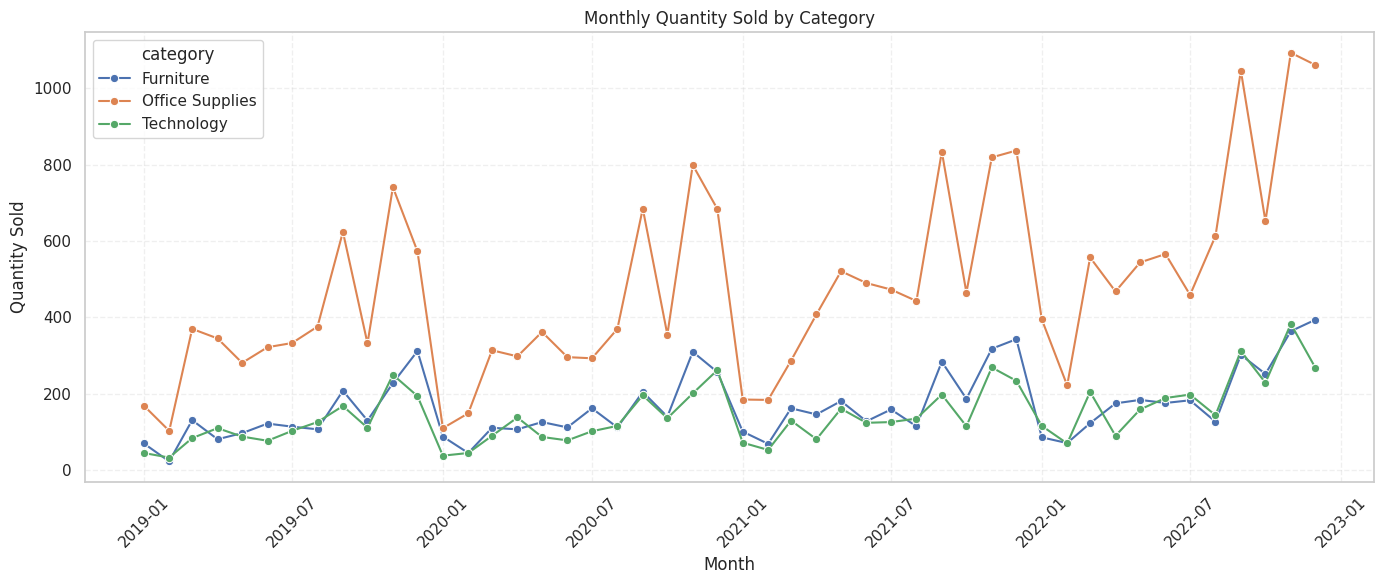

In [27]:
monthly_cat_quantity = df.groupby([df['order_month'], 'category'])['quantity'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_cat_quantity, x='order_month', y='quantity', hue='category', marker='o')
plt.title("Monthly Quantity Sold by Category")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig("monthly quantity sold by category.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


### Monthly Quantity Sold by Category

The line chart displays **monthly sales quantity trends** from 2019 to 2022 across three main product categories: **Furniture**, **Office Supplies**, and **Technology**.

- **Office Supplies** consistently leads in volume, showing strong seasonality and several sales spikes—particularly in late 2020 and 2022.
- **Furniture** and **Technology** exhibit lower but steady growth patterns, with noticeable increases in late 2022.
- All three categories show a sharp dip in early 2020, likely reflecting pandemic-related disruptions.

This visualization helps track sales momentum over time and supports inventory or marketing strategies aligned with seasonal demand patterns.


/tmp/ipython-input-28-4209307133.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_avg_quantity = df.groupby('order_month').apply(lambda x: x['quantity'].sum() / x['order_id'].nunique())


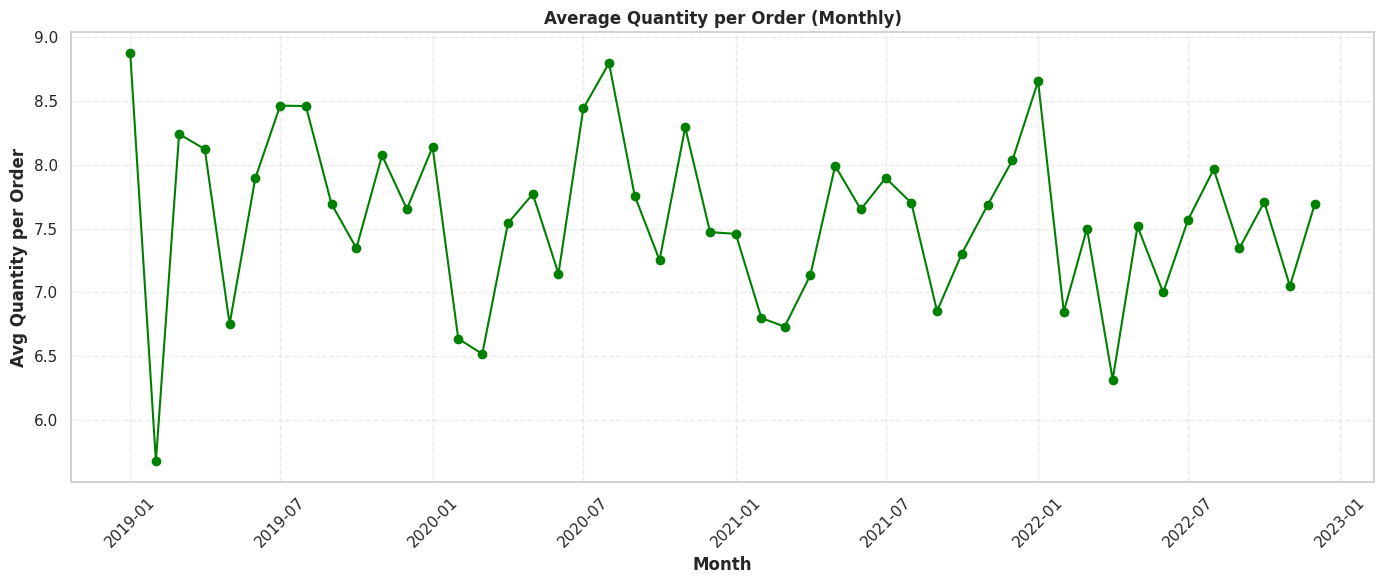

In [28]:
df['order_month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()
monthly_avg_quantity = df.groupby('order_month').apply(lambda x: x['quantity'].sum() / x['order_id'].nunique())

plt.figure(figsize=(14,6))
plt.plot(monthly_avg_quantity.index, monthly_avg_quantity.values, marker='o', color='green')
plt.title("Average Quantity per Order (Monthly)", fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.ylabel("Avg Quantity per Order", fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


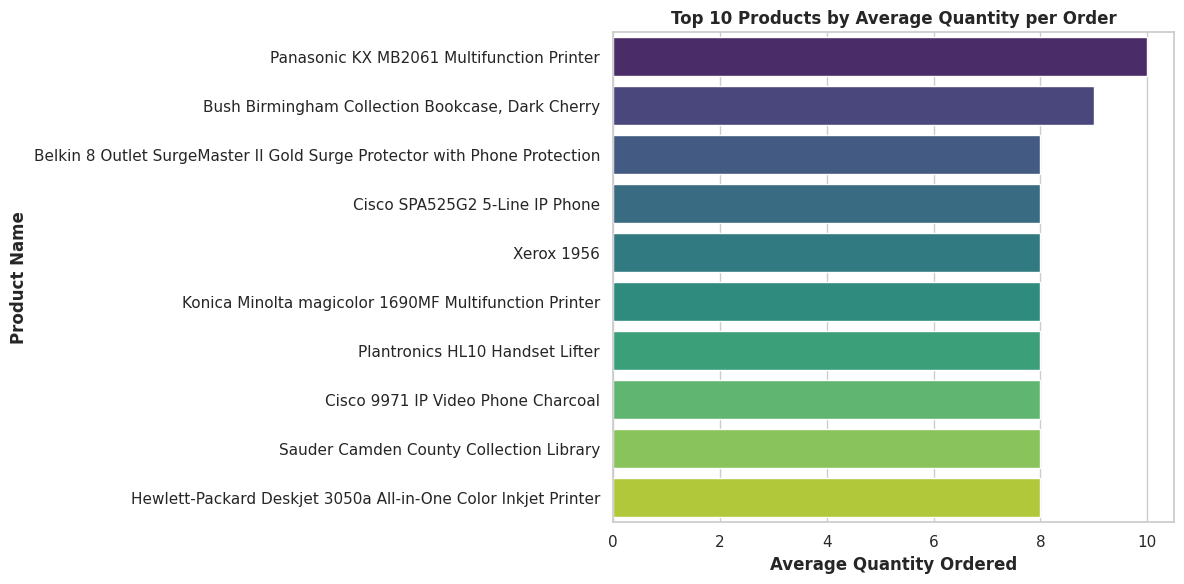

In [29]:
# Calculate average quantity per product
avg_qty = df.groupby('product_name')['quantity'].mean().sort_values(ascending=False).head(10)

# Convert to DataFrame so we can assign a dummy hue
avg_qty_df = avg_qty.reset_index()
avg_qty_df.columns = ['product_name', 'avg_quantity']
avg_qty_df['hue_label'] = avg_qty_df['product_name']  # Use product name as hue

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_qty_df,
    x='avg_quantity',
    y='product_name',
    hue='hue_label',           # Needed to use palette
    palette='viridis',
    legend=False               # Legend not needed; y-axis has product names
)
plt.title("Top 10 Products by Average Quantity per Order", fontweight='bold')
plt.xlabel("Average Quantity Ordered", fontweight='bold')
plt.ylabel("Product Name", fontweight='bold')
plt.tight_layout()
plt.show()

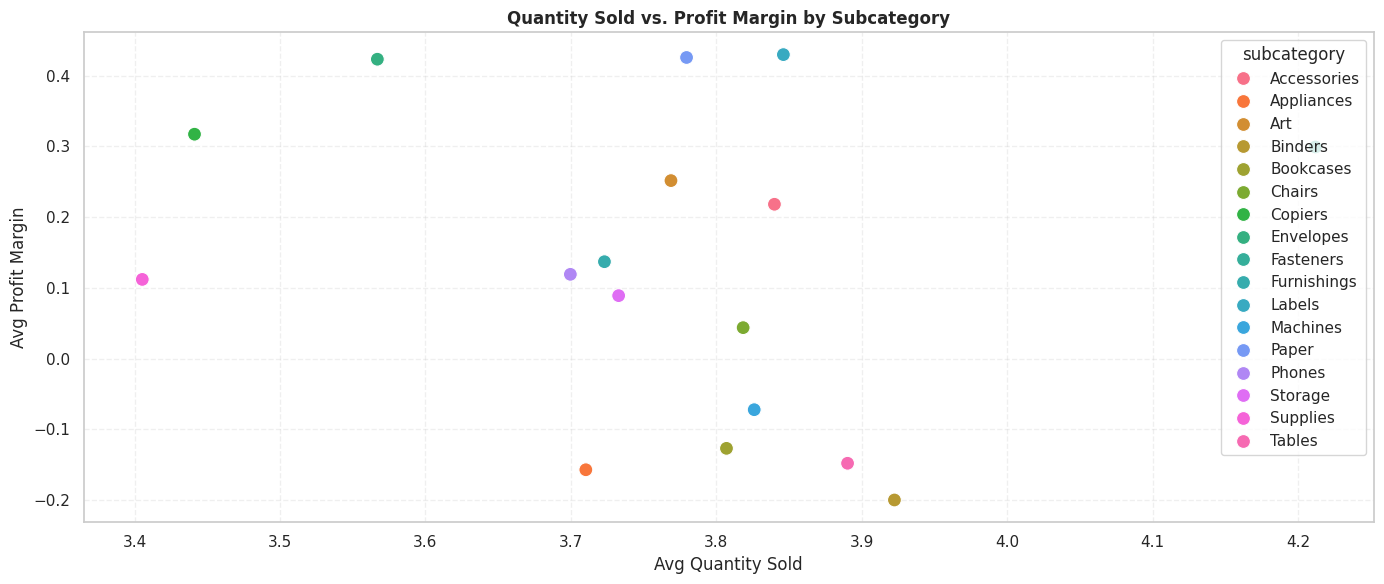

In [30]:
df['profit_margin'] = df['profit'] / df['sales']
summary = df.groupby('subcategory')[['quantity', 'profit_margin']].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.scatterplot(data=summary, x='quantity', y='profit_margin', hue='subcategory', s=100)
plt.title("Quantity Sold vs. Profit Margin by Subcategory", fontweight='bold')
plt.xlabel("Avg Quantity Sold")
plt.ylabel("Avg Profit Margin")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [31]:
import plotly.express as px

fig = px.bar(data_frame=df, x='category', y='profit', color='subcategory')
fig.show()

In [32]:
df['Order_Processing_Time'] = (df['ship_date'] - df['order_date']).dt.days
df.groupby('region')['Order_Processing_Time'].mean().sort_values()


,Order_Processing_Time
region,
East,3.909410
West,3.930066
South,3.959259
Central,4.057254


In [33]:
fig = px.sunburst(
    df,
    path=['category', 'subcategory'],
    values='sales',
    title='Sales Distribution by Category and Sub-Category')

fig.show()


### Sales Distribution by Category and Sub-Category

This **interactive sunburst chart** visualizes the **distribution of total sales** across product categories and their respective sub-categories.

- **Top-Level Categories**: *Furniture*, *Office Supplies*, and *Technology* form the inner ring, representing the overall sales share of each category.
- **Sub-Categories**: The outer segments highlight specific product types. For example, within *Furniture*, **Chairs** account for the largest share, with over **$328K in sales**.
- **Technology** shows strong contributions from **Phones** and **Machines**, while **Office Supplies** are more evenly distributed across multiple sub-categories.

By hovering over segments, users can explore **exact sales values**, **hierarchical relationships**, and quickly identify **top-performing segments** within each category.

> 🔍 *Use this interactive chart for dynamic exploration and deeper insight into sales concentration patterns.*


In [34]:
fig = px.scatter(
    df,
    x='sales',
    y='profit',
    color='category',
    size='quantity',
    hover_data=['subcategory'],
    title='Sales vs Profit Bubble Chart'
)
fig.show()


### Sales vs Profit Bubble Chart

This **interactive bubble chart** visualizes the relationship between **sales and profit** for various product sub-categories, across three main categories.

- **X-Axis (Sales)**: Total sales amount for each sub-category.
- **Y-Axis (Profit)**: Corresponding profit earned.
- **Bubble Size**: Represents the **quantity sold**.
- **Color**: Denotes the **product category** (Furniture, Office Supplies, Technology).
- **Hover Tooltips**: Reveal detailed **subcategory** information dynamically.

#### Key Insights:
- Positive correlation is seen in many Technology sub-categories with larger bubbles indicating high quantity and profitability.
- Several sub-categories from Furniture and Office Supplies lie in the **negative profit** zone despite high sales, highlighting inefficiencies or loss leaders.
- The chart makes it easy to identify **high-performing** vs **underperforming** sub-categories at a glance.

> 🧭 *Use this interactive visualization to explore patterns, outliers, and trends in sales performance and profitability.*


In [35]:
df['order_date'] = pd.to_datetime(df['order_date'])
time_data = df.groupby(['order_date', 'region'])['sales'].sum().reset_index()

fig = px.line(
    time_data,
    x='order_date',
    y='sales',
    color='region',
    title='Sales Trend Over Time by Region'
)
fig.show()


### Sales Trend Over Time by Region

This **line chart** visualizes the **sales trends** over time, segmented by **region**.

- **X-Axis**: `order_date` — Time (converted to datetime).
- **Y-Axis**: Total `sales` (aggregated per day).
- **Color**: Each line represents a different region (Central, East, South, West).

#### Key Observations:
- Sales are **highly variable over time**, with **spikes** observed across all regions.
- The **South** region shows a few exceptionally high peaks, possibly due to large orders or promotions.
- The **West** and **East** regions appear to have relatively consistent high-frequency fluctuations.
- **Central** region trends tend to remain moderate and less volatile.

> 📈 *Use this interactive chart to analyze sales seasonality, regional performance trends, and any anomalies in daily sales.*


In [36]:
fig = px.bar(
    df,
    x='subcategory',
    y='sales',
    color='subcategory',
    title='Sub-Category Sales by Category',
    facet_col='category'
)
fig.show()

### Sub-Category Sales by Category

This **interactive bar chart** breaks down **sales data by sub-category**, with separate panels (facets) for each main product **category**.

- **X-Axis**: Product **sub-categories** (e.g., Chairs, Phones, Binders).
- **Y-Axis**: Corresponding **sales volume**.
- **Color**: Each sub-category is assigned a unique color for better visual differentiation.
- **Facets**: The chart is divided into three separate plots:
  - Office Supplies
  - Furniture
  - Technology

#### Key Highlights:
- **Technology** sub-category "Phones" and "Machines" show strong sales performance.
- In **Furniture**, "Chairs" and "Tables" dominate in terms of revenue.
- **Office Supplies** are more evenly distributed, but "Binders" and "Paper" show noticeable peaks.

> 📊 *Use the interactive chart to hover over each bar and explore sub-category performance within their respective main categories.*


## ✅ Final Conclusions

📌 After a detailed sales and inventory analysis using the Superstore dataset, here are the key takeaways:

- **Top Performers**:  
  - **Technology** category leads in both sales and profit, especially sub-categories like **Phones** and **Accessories**.  
  - **Office Supplies** are high in sales volume but have moderate profit margins.

- **Underperforming Segments**:  
  - Certain **Furniture** sub-categories such as **Tables** and **Bookcases** have **high sales but negative profits**, indicating potential loss leaders or pricing inefficiencies.

- **Regional Insights**:  
  - The **South** and **West** regions show consistently high sales performance.  
  - **Central** region displays relatively stable trends but lower overall figures.

- **Customer Segment Trends**:  
  - **Consumer** and **Corporate** segments are the most profitable.  
  - The **Home Office** segment, while smaller, also contributes meaningfully.

- **Temporal Patterns**:  
  - Sales show **seasonal spikes**, especially during the year-end months (November–December).  
  - Shipping delays are generally within 3 days, but occasional outliers suggest room for operational improvement.

- **Inventory & Profitability**:  
  - High **quantity sold** doesn’t always equate to high profitability—highlighting the need for **margin-based stocking** decisions.  
  - **Profit margin analysis** reveals opportunities to phase out or reprice underperforming products.

> 🎯 **Recommendation**: Focus future efforts on expanding high-margin sub-categories, optimizing inventory for loss-leading items, and tailoring promotions by region and seasonality.
